In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [3]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
data.describe().round(2)

,release_year
count,9668.00
mean,2008.34
std,18.92
min,1920.00
25%,2007.00
50%,2016.00
75%,2019.00
max,2021.00


In [5]:
data.duplicated().sum()

0

In [6]:
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill NaN values with mean for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
data['cast'].fillna("Unknown", inplace=True)

/tmp/ipykernel_18/3879626510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cast'].fillna("Unknown", inplace=True)


In [10]:
data['director'].fillna("Unknown", inplace=True)


/tmp/ipykernel_18/2172060559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna("Unknown", inplace=True)


In [11]:
data['date_added'].fillna("Unknown", inplace=True)

/tmp/ipykernel_18/1604375320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['date_added'].fillna("Unknown", inplace=True)


In [12]:
most_common_country = data['country'].mode()[0]
data['country'].fillna(most_common_country, inplace=True)

/tmp/ipykernel_18/3334777381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(most_common_country, inplace=True)


In [13]:
most_common_rating = data['rating'].mode()[0]
data['rating'].fillna(most_common_rating, inplace=True)

/tmp/ipykernel_18/2899527461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna(most_common_rating, inplace=True)


In [14]:
data_remove=['description']
data=data.drop(columns=data_remove)

In [15]:
#data_remove=['show_id']
#data=data.drop(columns=data_remove)

In [16]:
#data_remove=['cast']
#data=data.drop(columns=data_remove)

In [17]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [18]:
data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
572,s573,TV Show,The Last Post,Unknown,"Jessie Buckley, Jeremy Neumark Jones, Tom Glyn...",United States,Unknown,2017,16+,1 Season,"Drama, Historical, Military and War"
9499,s9500,Movie,Kept Woman,Michel Poulette,"Courtney Ford, Shaun Benson, Andrew W. Walker,...",United States,Unknown,2015,PG-13,90 min,"Drama, Suspense"
7583,s7584,Movie,Amyloid,Raymelle A Adams,"Kathy Valent, Crystal Hill",United States,Unknown,2021,16+,56 min,Drama
8992,s8993,TV Show,The Latino Americans,Unknown,Benjamin Bratt,United States,Unknown,2013,TV-PG,1 Season,Special Interest
9010,s9011,TV Show,Manhunt,Unknown,"Martin Clunes, Katie Lyons, Claudie Blakley, S...",United States,Unknown,2019,TV-NR,1 Season,TV Shows
722,s723,TV Show,The Carol Burnett Show,Unknown,"Carol Burnett, Tim Conway, Vicki Lawrence, Luc...",United States,Unknown,1972,13+,1 Season,Comedy
4222,s4223,Movie,The Lou Gehrig Story,John Hunter,Ed Smith,United States,Unknown,2007,G,59 min,Drama
7299,s7300,Movie,The Gigolo 2,Kwok-Man Keung,"Nancy Chow, Iris Chung, Dominic Ho, Tony Ho, C...",United States,Unknown,2016,18+,96 min,Comedy
6237,s6238,Movie,Get Back Up,Norry Niven,"Justin Furstenfeld, Sarah Furstenfeld, Jeremy ...",United States,Unknown,2020,16+,106 min,Documentary
4403,s4404,Movie,Aalo Chhaya,Anasuya Samanta,"Riya, Riwk, Soumitra Chatterjee, Anamika Saha,...",United States,Unknown,2014,13+,154 min,Romance


In [19]:
data['rating'].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [20]:
rating_counts = data['rating'].value_counts()
rating_counts

rating
13+         2454
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [21]:
# Exclude rows where the director is "Unknown"
filtered_directors = data[data['director'] != 'Unknown']
top_directors = filtered_directors['director'].value_counts().head(10)
print("Top 10 Prolific Directors:")
print(top_directors)

# Exclude rows where the cast is "Unknown"
filtered_actors = data[data['cast'] != 'Unknown']
top_actors = filtered_actors['cast'].value_counts().head(10)
print("\nTop 10 Prolific Actors:")
print(top_actors)


Top 10 Prolific Directors:
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

Top 10 Prolific Actors:
cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
Gallagher                            9
LB, Aaron Michael                    9
Eddie Izzard                         9
Name: count, dtype: int64


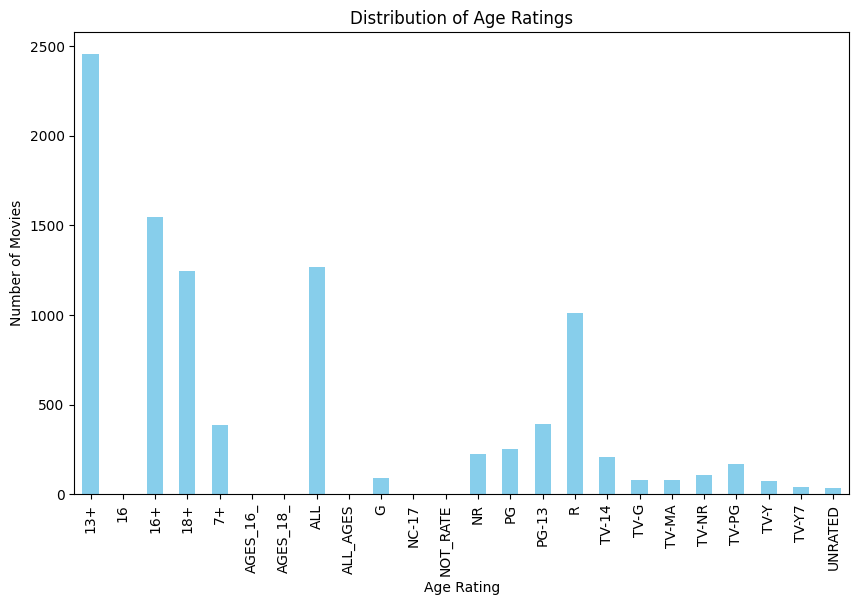

In [22]:
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


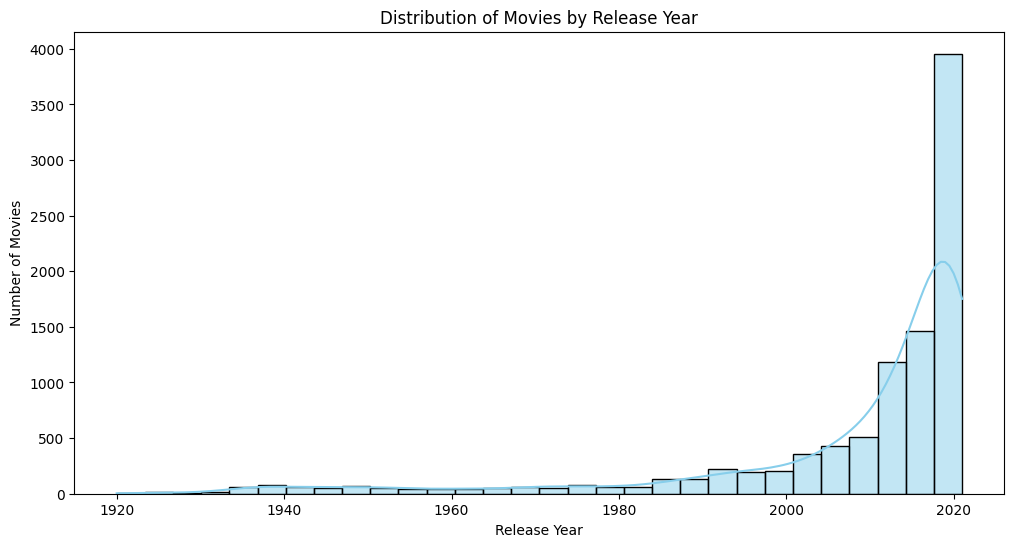

In [23]:
# Distribution of movies by release year
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

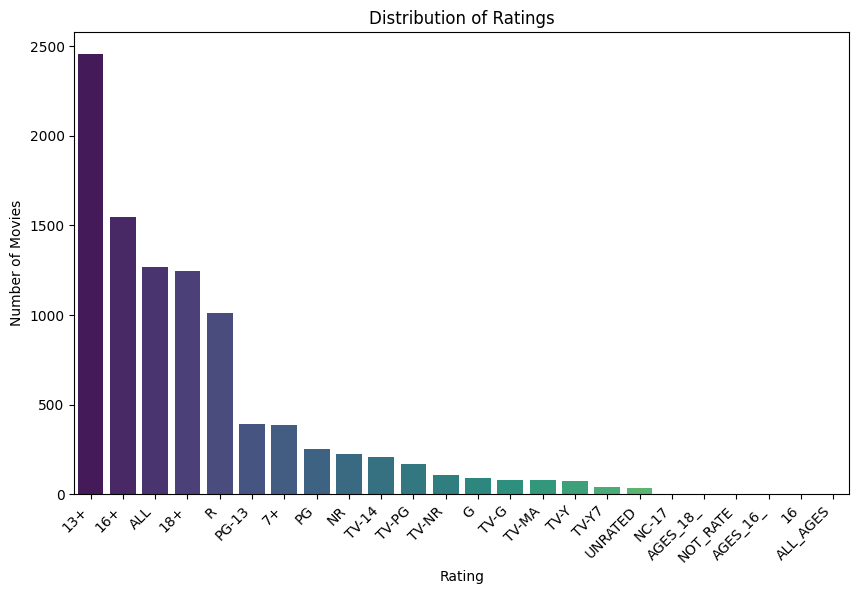

In [24]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

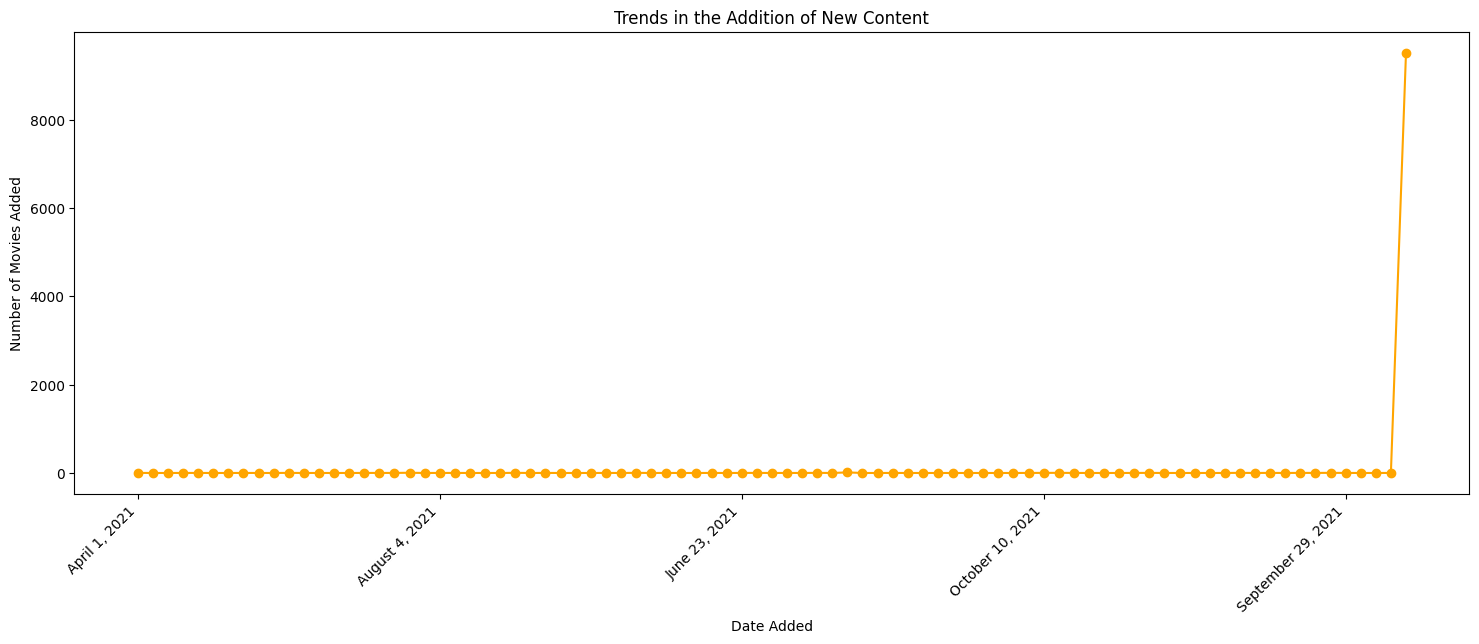

In [25]:
# Trends or patterns in the addition of new content
date_added_trends = data.groupby('date_added')['show_id'].count()
plt.figure(figsize=(18, 6))
date_added_trends.plot(marker='o', linestyle='-', color='orange')
plt.title('Trends in the Addition of New Content')
plt.xlabel('Date Added')
plt.ylabel('Number of Movies Added')
plt.xticks(rotation=45, ha='right')
plt.show()

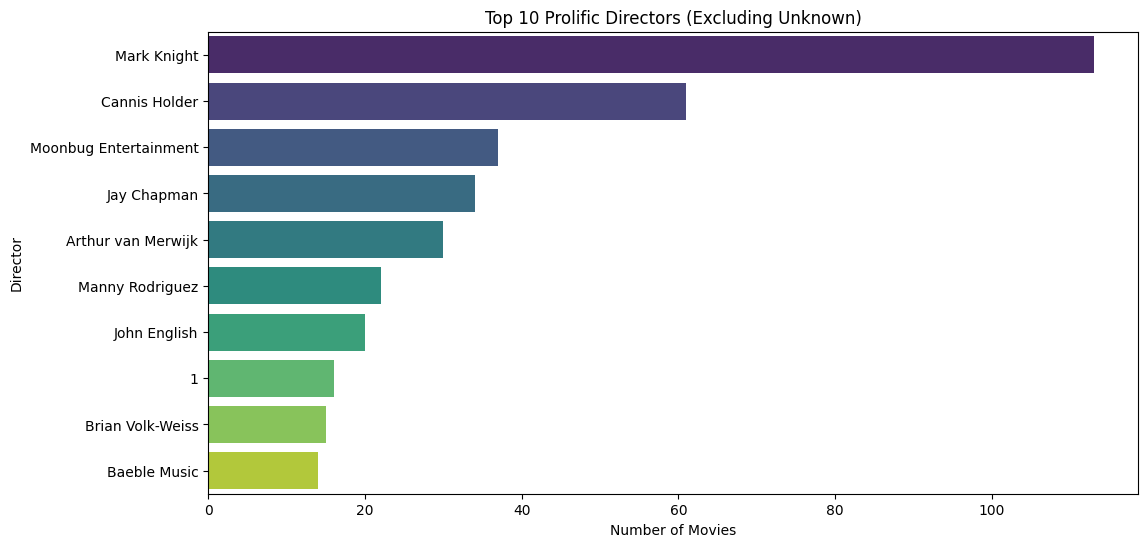

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Prolific Directors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

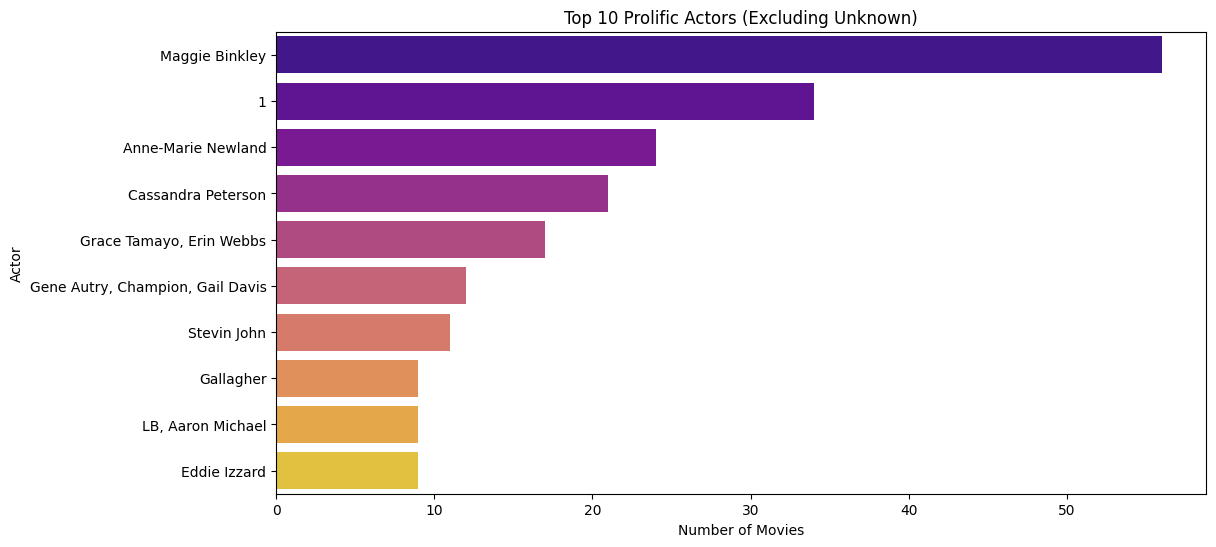

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific Actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

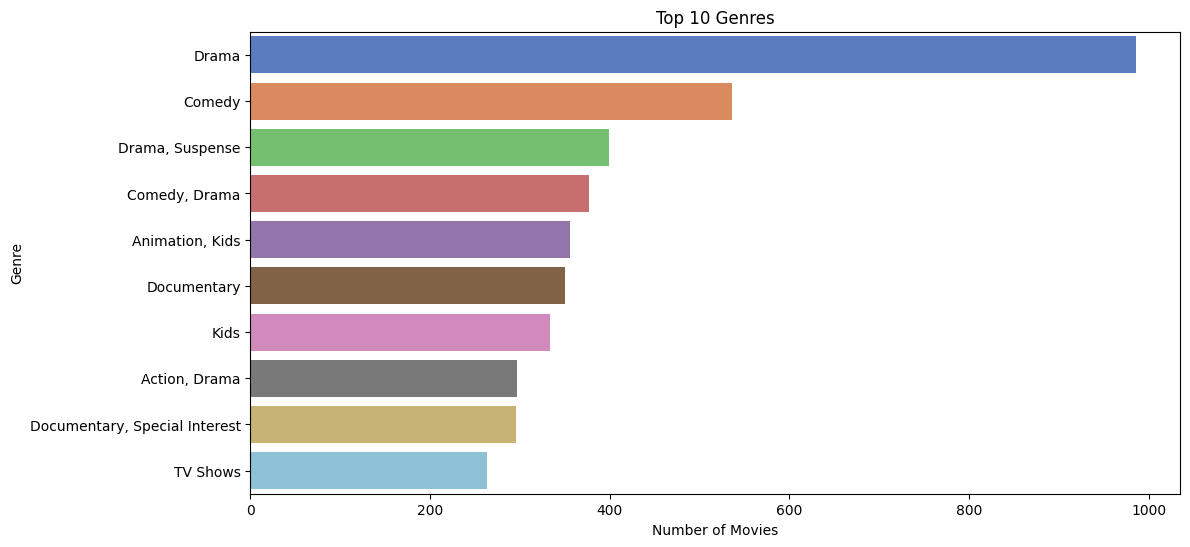

In [28]:
# Top genres
top_genres = data['listed_in'].value_counts().head(10)

# Plot Top Genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


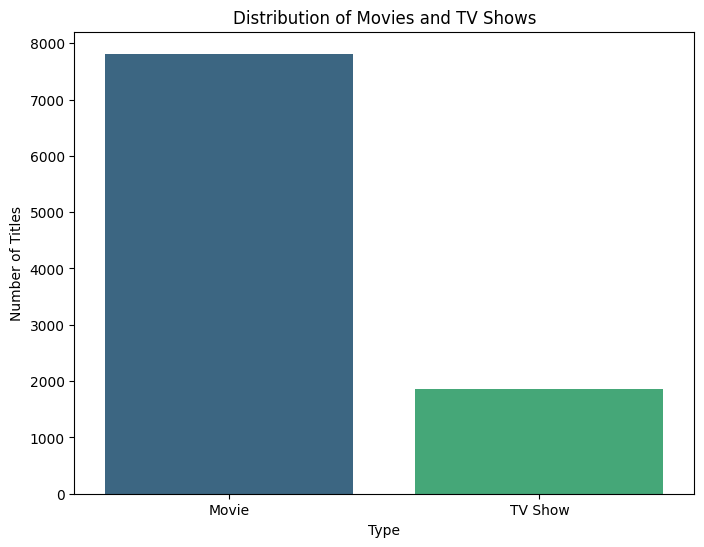

In [29]:
# Plotting the distribution of movies and TV shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()


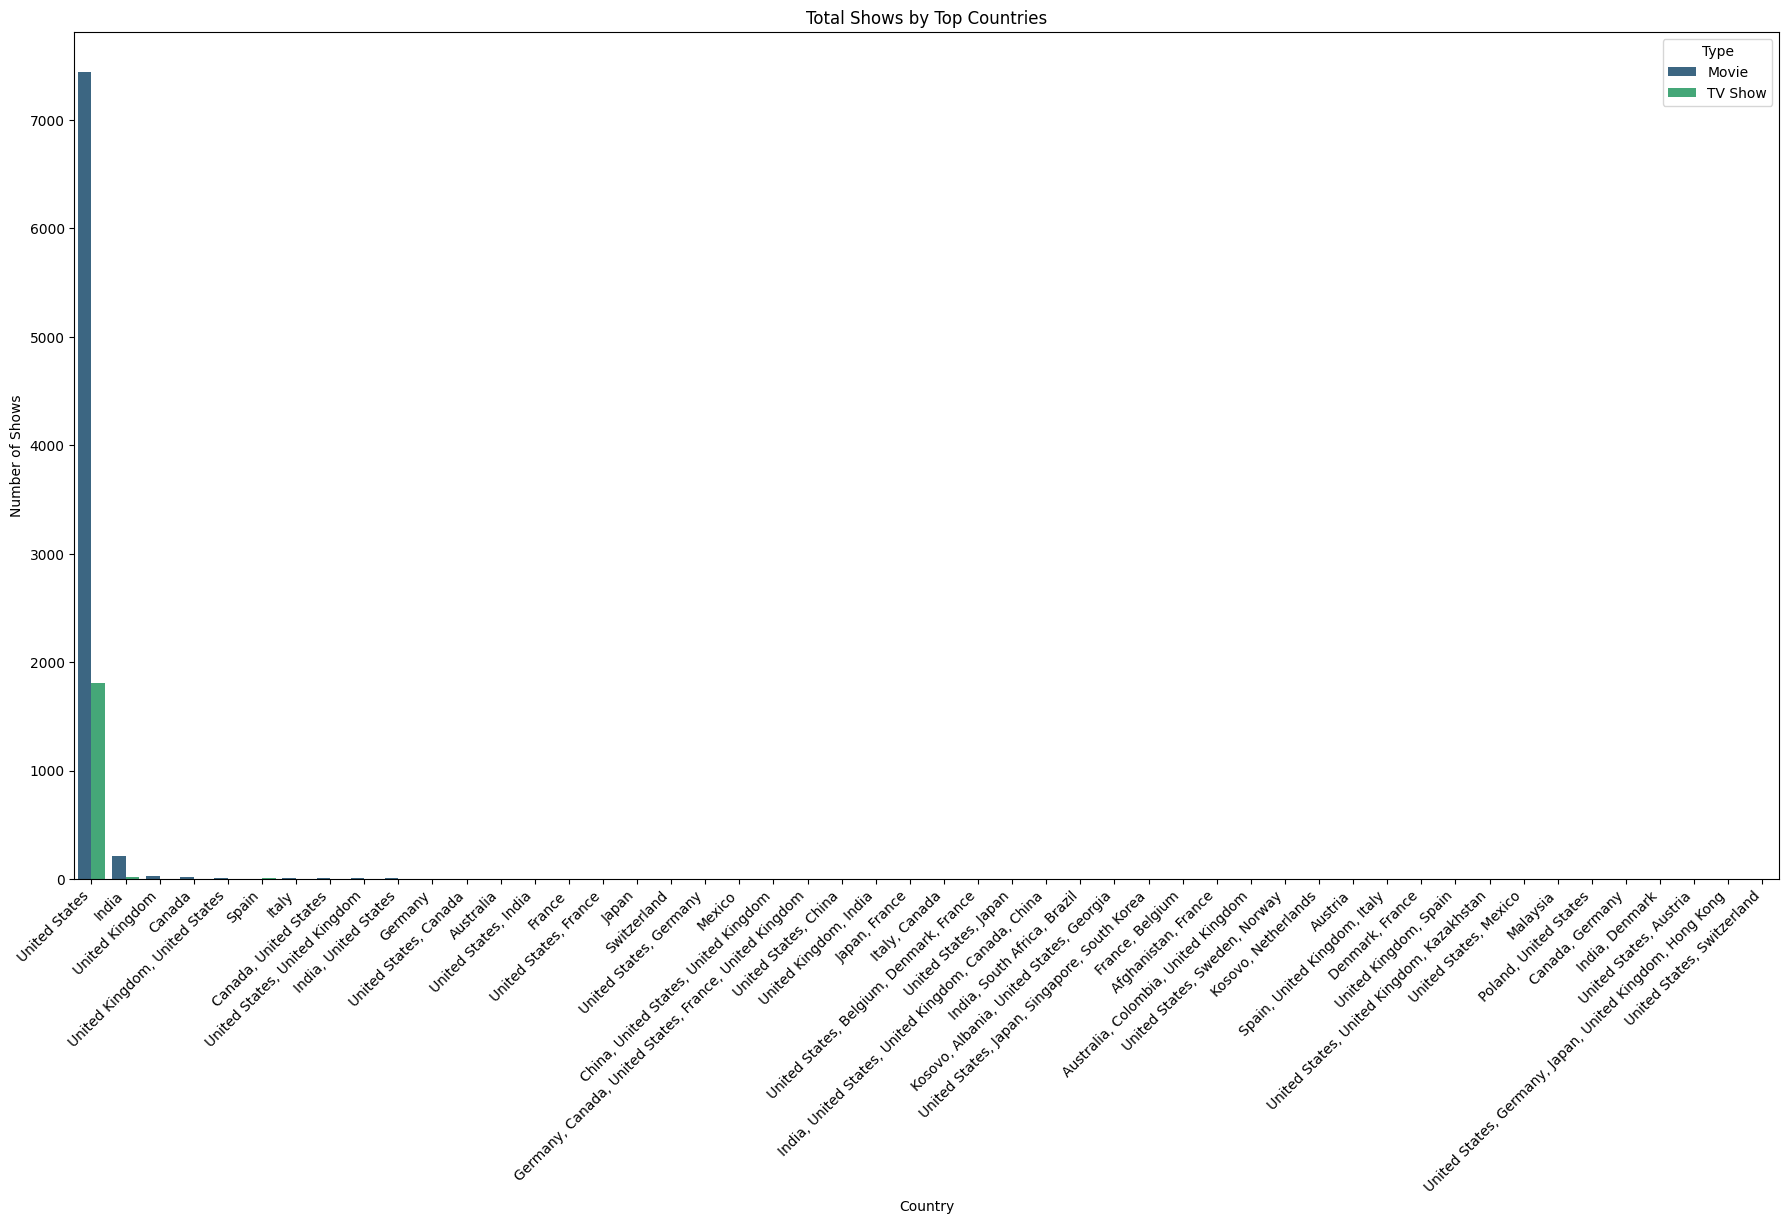

In [30]:
# Top N countries
top_countries = data['country'].value_counts().head(50).index

# Filter the data for the top countries
filtered_data = data[data['country'].isin(top_countries)]

# Visualize the total shows by country for the top countries
plt.figure(figsize=(22, 11))
sns.countplot(x='country', data=filtered_data, hue='type', order=top_countries, palette='viridis')
plt.title('Total Shows by Top Countries')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

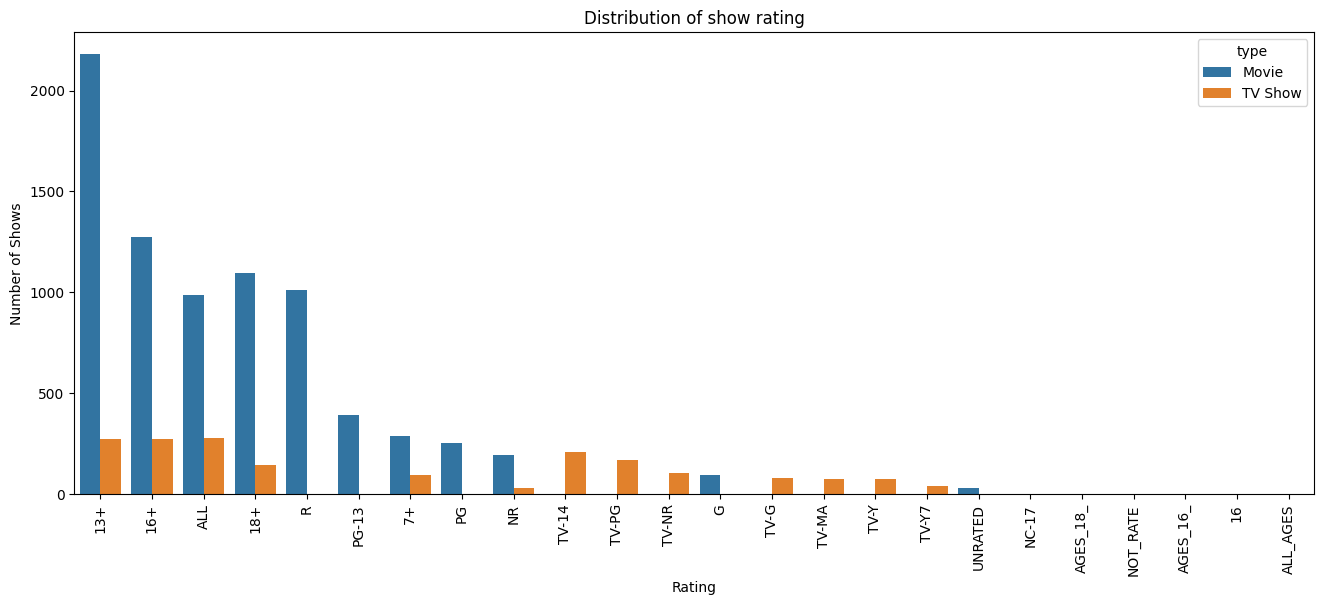

In [31]:
data_count1=data['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating',data=data,hue='type',order=data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of show rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()